In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import math
import glob
import os

## Cross-alignment results among reference sequences

Before running this script, convert all outfmt6 files generated from the cross-alignment between reference sequences into CSV format using convert_to_csv.py, which is located in the alignment_parameters folder.

In [ ]:
# Concatenates all reference cross-alignment CSV files into a single dataframe

# Define the directory where the CSV files are located
directory = "./csvs"

# Get all .csv files in the directory
reference_files = glob.glob(os.path.join(directory, "*.csv"))

# Read and concatenate all files
dfs = []

for file in reference_files:
    df = pd.read_csv(file)
    dfs.append(df)

df_references = pd.concat(dfs, ignore_index=True)

# Save into a single file
output_path = os.path.join(directory, "df_references.csv")
df_references.to_csv(output_path, index=False)

print(f"Final file saved to: {output_path}")

Final file saved to: ./csvs/df_references.csv


In [3]:
df_references.head(10)

,qseqid,sseqid,pident,ppos,length,evalue,bitscore,qlen,slen,length_ratio,coverage
0,WP_379703507.1,WP_379703507.1,100.0,100.0,110,1.900000e-59,211.5,208,208,100.000000,52.884615
1,AAC43301.1,AAC43301.1,100.0,100.0,207,3.000000e-65,230.7,207,207,100.000000,100.000000
2,tr|Q5LEN2|Q5LEN2_BACFN,tr|Q5LEN2|Q5LEN2_BACFN,100.0,100.0,516,8.200000e-311,1048.1,516,516,100.000000,100.000000
3,ADO95687.1,ADO95687.1,100.0,100.0,332,6.800000e-179,609.4,332,332,100.000000,100.000000
4,ADO95687.1,EFU71838.1,47.9,65.9,217,1.700000e-57,206.1,332,230,69.277108,94.347826
5,EFU71838.1,EFU71838.1,100.0,100.0,230,3.000000e-133,457.2,230,230,100.000000,100.000000
6,EFU71838.1,ADO95687.1,47.9,65.9,217,1.200000e-57,206.1,230,332,144.347826,65.361446
7,sp|Q662L3|NAGB_BORGP,sp|Q662L3|NAGB_BORGP,100.0,100.0,268,4.700000e-159,544.3,268,268,100.000000,100.000000
8,sp|Q662L3|NAGB_BORGP,sp|B5FBU7|NAGB_ALIFM,58.8,79.8,262,1.800000e-97,339.7,268,266,99.253731,98.496241
9,sp|Q662L3|NAGB_BORGP,sp|O35000|NAGB_BACSU,42.0,64.2,243,9.800000e-56,201.1,268,242,90.298507,100.413223


In [4]:
# Range of the reference parameters

df_refs = pd.read_csv('./csvs/df_references.csv')
params = ['length_ratio', 'coverage', 'pident', 'ppos']

min = df_refs[params].min()
max = df_refs[params].max()

df_refs[params].agg(['min', 'max'])

,length_ratio,coverage,pident,ppos
min,27.330174,8.706786,19.6,35.0
max,365.895954,135.172414,100.0,100.0


### Heatmaps

In [13]:
# Remove the df_references dataframe before the plots

! rm ./csvs/df_references.csv

rm: cannot remove './csvs/df_references.csv': No such file or directory


/tmp/ipykernel_2166312/3294008412.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1], pad=1.0)


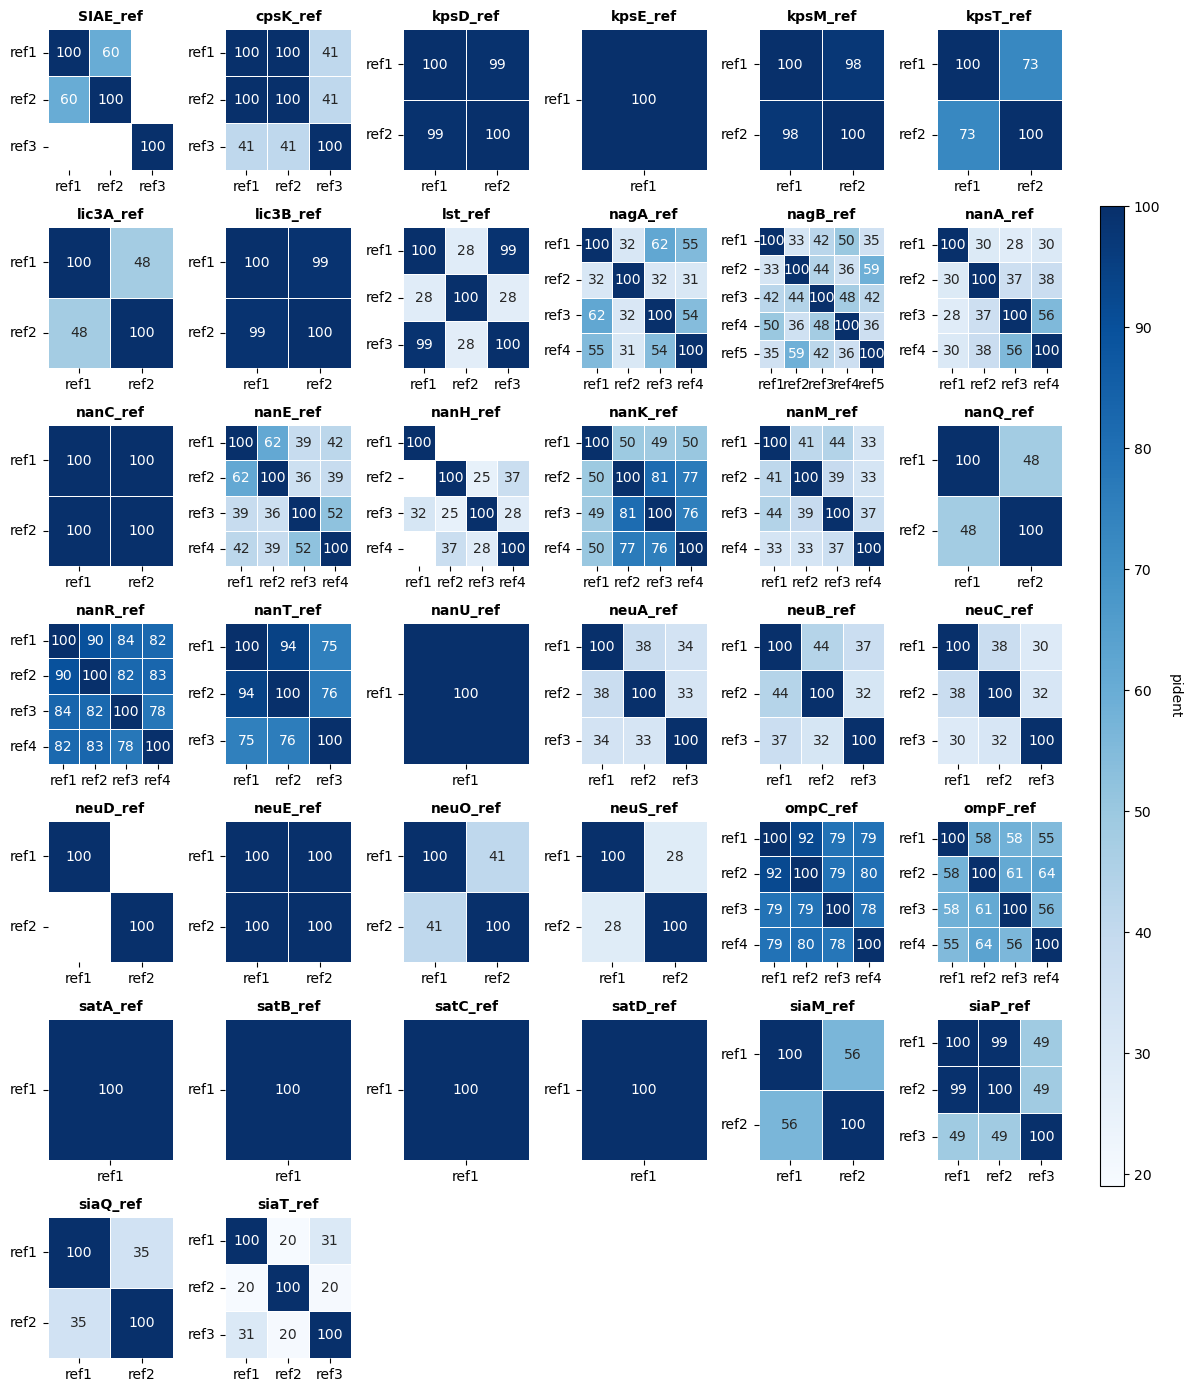

In [14]:
# Plotting identity

directory = "./csvs"

# Parameter to visualize
parameter = 'pident'

# List all .csv files in the folder
files = [f for f in os.listdir(directory) if f.endswith(".csv")]
files.sort()  # keep alphabetical order

# Number of files
n = len(files)

# Automatically define grid size
cols = 6
rows = math.ceil(n / cols)

# Figure size
fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
axes = axes.flatten()

# Normalization and colormap
vmin, vmax = 19, 100
cmap = plt.cm.Blues
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

# Loop to generate each heatmap
for idx, file in enumerate(files):
    df = pd.read_csv(os.path.join(directory, file))
    
    # Create identity matrix
    matrix = df.pivot(index='qseqid', columns='sseqid', values=parameter)
    
    # Copy only for visualization
    matrix_plot = matrix.copy()
    matrix_plot.index = [f"ref{i+1}" for i in range(len(matrix_plot.index))]
    matrix_plot.columns = [f"ref{j+1}" for j in range(len(matrix_plot.columns))]
    
    # Plot heatmap
    sns.heatmap(
        matrix_plot,
        annot=True, fmt=".0f",
        annot_kws={"size": 10},
        cmap=cmap,
        vmin=vmin, vmax=vmax,
        linewidths=0.5, linecolor="white",
        ax=axes[idx],
        cbar=False
    )
    
    # Title using filename (without .csv)
    title = os.path.splitext(file)[0]
    axes[idx].set_title(title, fontweight="bold", fontsize=10)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('')
    axes[idx].tick_params(axis='x', labelsize=10, rotation=0)
    axes[idx].tick_params(axis='y', labelsize=10, rotation=0)

# Remove extra subplots
for i in range(n, len(axes)):
    fig.delaxes(axes[i])

# Add global colorbar
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cb = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm)
cb.set_label(parameter, rotation=270, labelpad=15)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1], pad=1.0)
plt.show()

/tmp/ipykernel_2166312/3970675216.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1], pad=1.0)


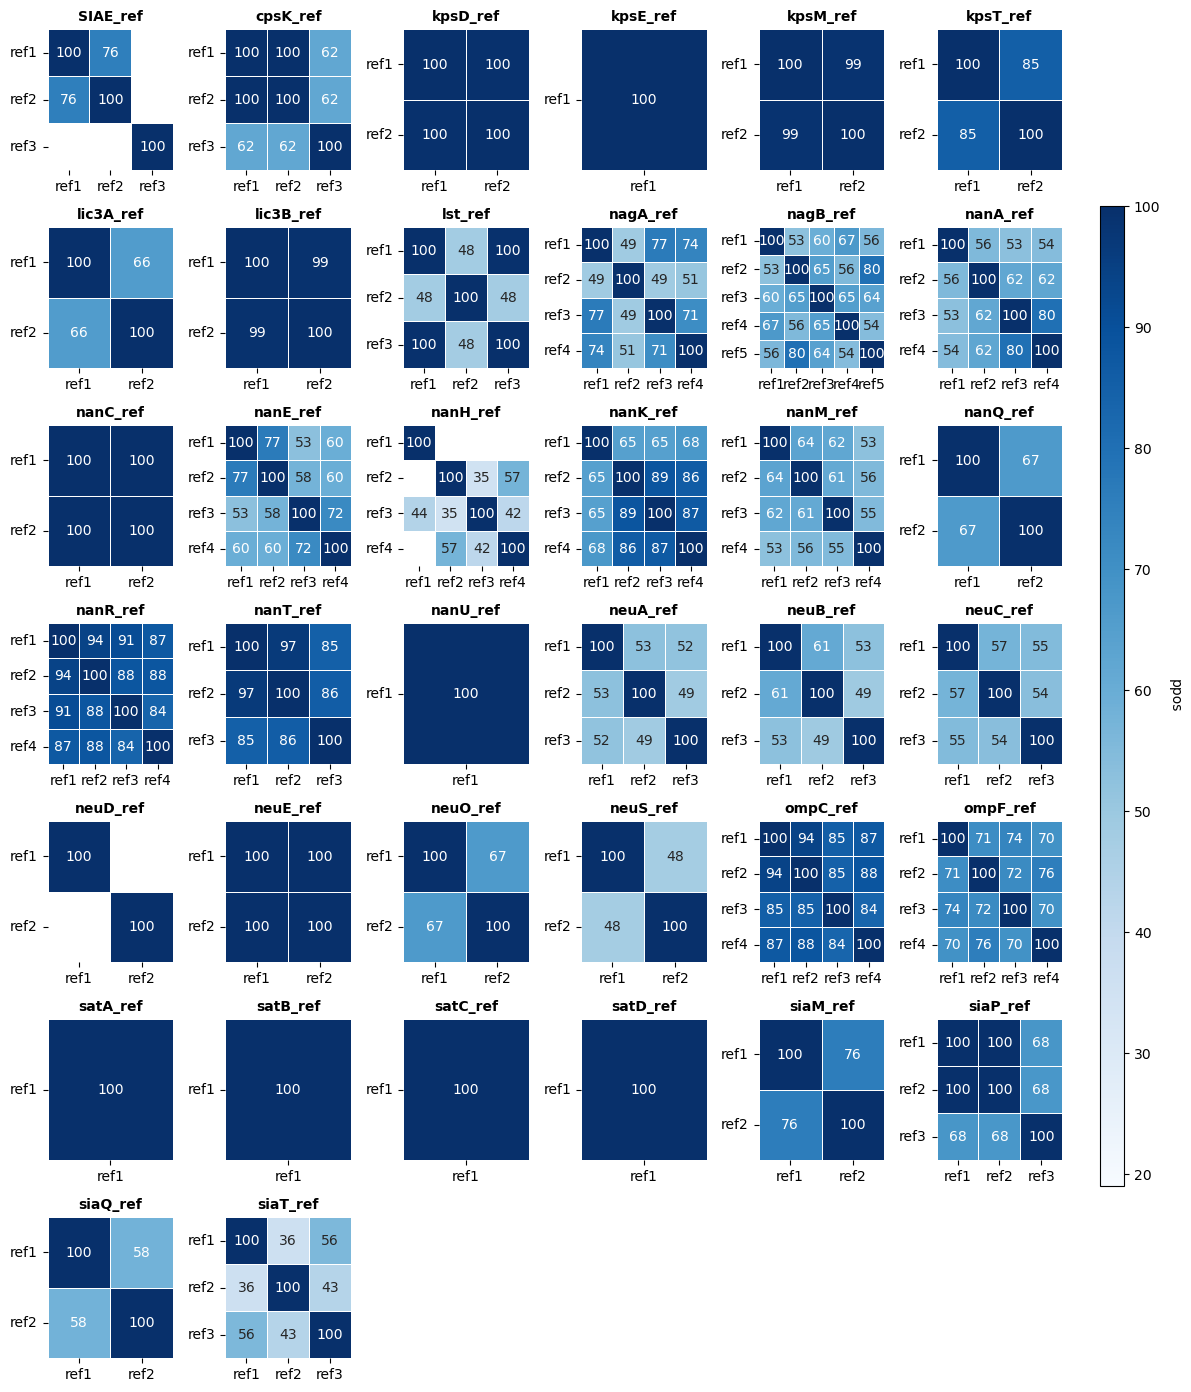

In [15]:
# Plotting similarity 

directory = "./csvs"

# Parameter to visualize
parameter = 'ppos'

# List all .csv files in the folder
files = [f for f in os.listdir(directory) if f.endswith(".csv")]
files.sort()  # keep alphabetical order

# Number of files
n = len(files)

# Automatically define grid size
cols = 6
rows = math.ceil(n / cols)

# Figure size
fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
axes = axes.flatten()

# Normalization and colormap
vmin, vmax = 19, 100
cmap = plt.cm.Blues
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

# Loop to generate each heatmap
for idx, file in enumerate(files):
    df = pd.read_csv(os.path.join(directory, file))
    
    # Create identity matrix
    matrix = df.pivot(index='qseqid', columns='sseqid', values=parameter)
    
    # Copy only for visualization
    matrix_plot = matrix.copy()
    matrix_plot.index = [f"ref{i+1}" for i in range(len(matrix_plot.index))]
    matrix_plot.columns = [f"ref{j+1}" for j in range(len(matrix_plot.columns))]
    
    # Plot heatmap
    sns.heatmap(
        matrix_plot,
        annot=True, fmt=".0f",
        annot_kws={"size": 10},
        cmap=cmap,
        vmin=vmin, vmax=vmax,
        linewidths=0.5, linecolor="white",
        ax=axes[idx],
        cbar=False
    )
    
    # Title using filename (without .csv)
    title = os.path.splitext(file)[0]
    axes[idx].set_title(title, fontweight="bold", fontsize=10)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('')
    axes[idx].tick_params(axis='x', labelsize=10, rotation=0)
    axes[idx].tick_params(axis='y', labelsize=10, rotation=0)

# Remove extra subplots
for i in range(n, len(axes)):
    fig.delaxes(axes[i])

# Add global colorbar
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cb = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm)
cb.set_label(parameter, rotation=270, labelpad=15)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1], pad=1.0)
plt.show()


/tmp/ipykernel_2166312/306829869.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1], pad=1.0)


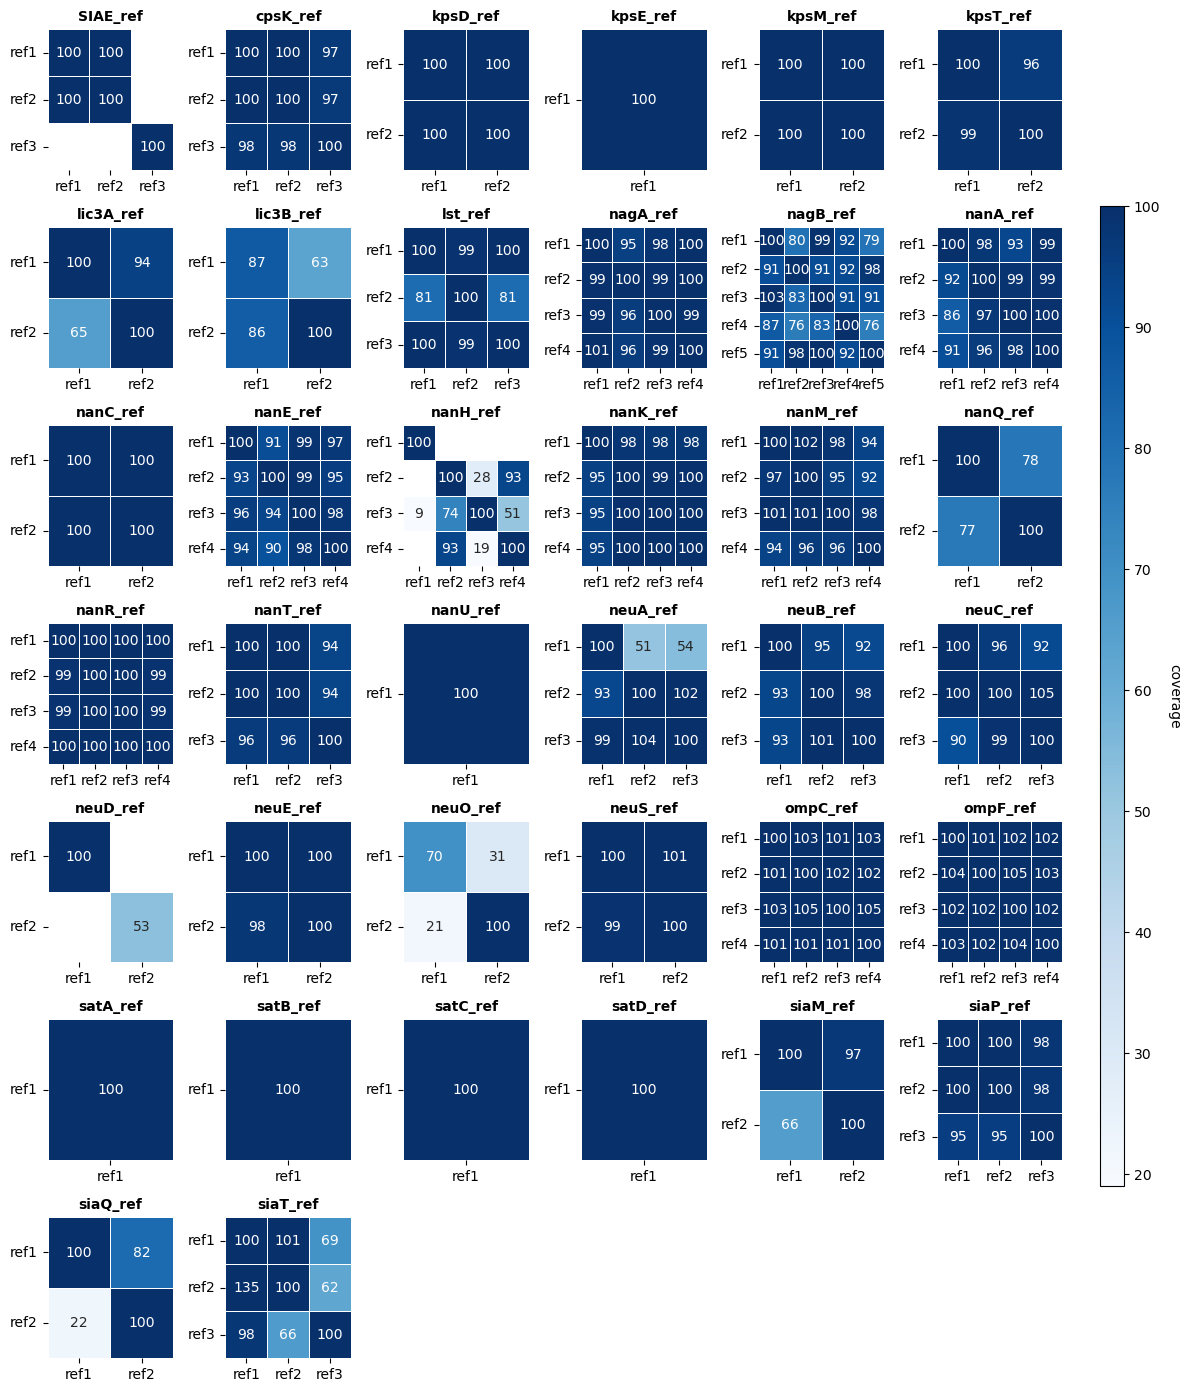

In [16]:
# Plotting coverage

directory = "./csvs"

# Parameter to visualize
parameter = 'coverage'

# List all .csv files in the folder
files = [f for f in os.listdir(directory) if f.endswith(".csv")]
files.sort()  # keep alphabetical order

# Number of files
n = len(files)

# Automatically define grid size
cols = 6
rows = math.ceil(n / cols)

# Figure size
fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
axes = axes.flatten()

# Normalization and colormap
vmin, vmax = 19, 100
cmap = plt.cm.Blues
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

# Loop to generate each heatmap
for idx, file in enumerate(files):
    df = pd.read_csv(os.path.join(directory, file))
    
    # Create identity matrix
    matrix = df.pivot(index='qseqid', columns='sseqid', values=parameter)
    
    # Copy only for visualization
    matrix_plot = matrix.copy()
    matrix_plot.index = [f"ref{i+1}" for i in range(len(matrix_plot.index))]
    matrix_plot.columns = [f"ref{j+1}" for j in range(len(matrix_plot.columns))]
    
    # Plot heatmap
    sns.heatmap(
        matrix_plot,
        annot=True, fmt=".0f",
        annot_kws={"size": 10},
        cmap=cmap,
        vmin=vmin, vmax=vmax,
        linewidths=0.5, linecolor="white",
        ax=axes[idx],
        cbar=False
    )
    
    # Title using filename (without .csv)
    title = os.path.splitext(file)[0]
    axes[idx].set_title(title, fontweight="bold", fontsize=10)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('')
    axes[idx].tick_params(axis='x', labelsize=10, rotation=0)
    axes[idx].tick_params(axis='y', labelsize=10, rotation=0)

# Remove extra subplots
for i in range(n, len(axes)):
    fig.delaxes(axes[i])

# Add global colorbar
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cb = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm)
cb.set_label(parameter, rotation=270, labelpad=15)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1], pad=1.0)
plt.show()

/tmp/ipykernel_2166312/1730291673.py:71: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1], pad=1.0)


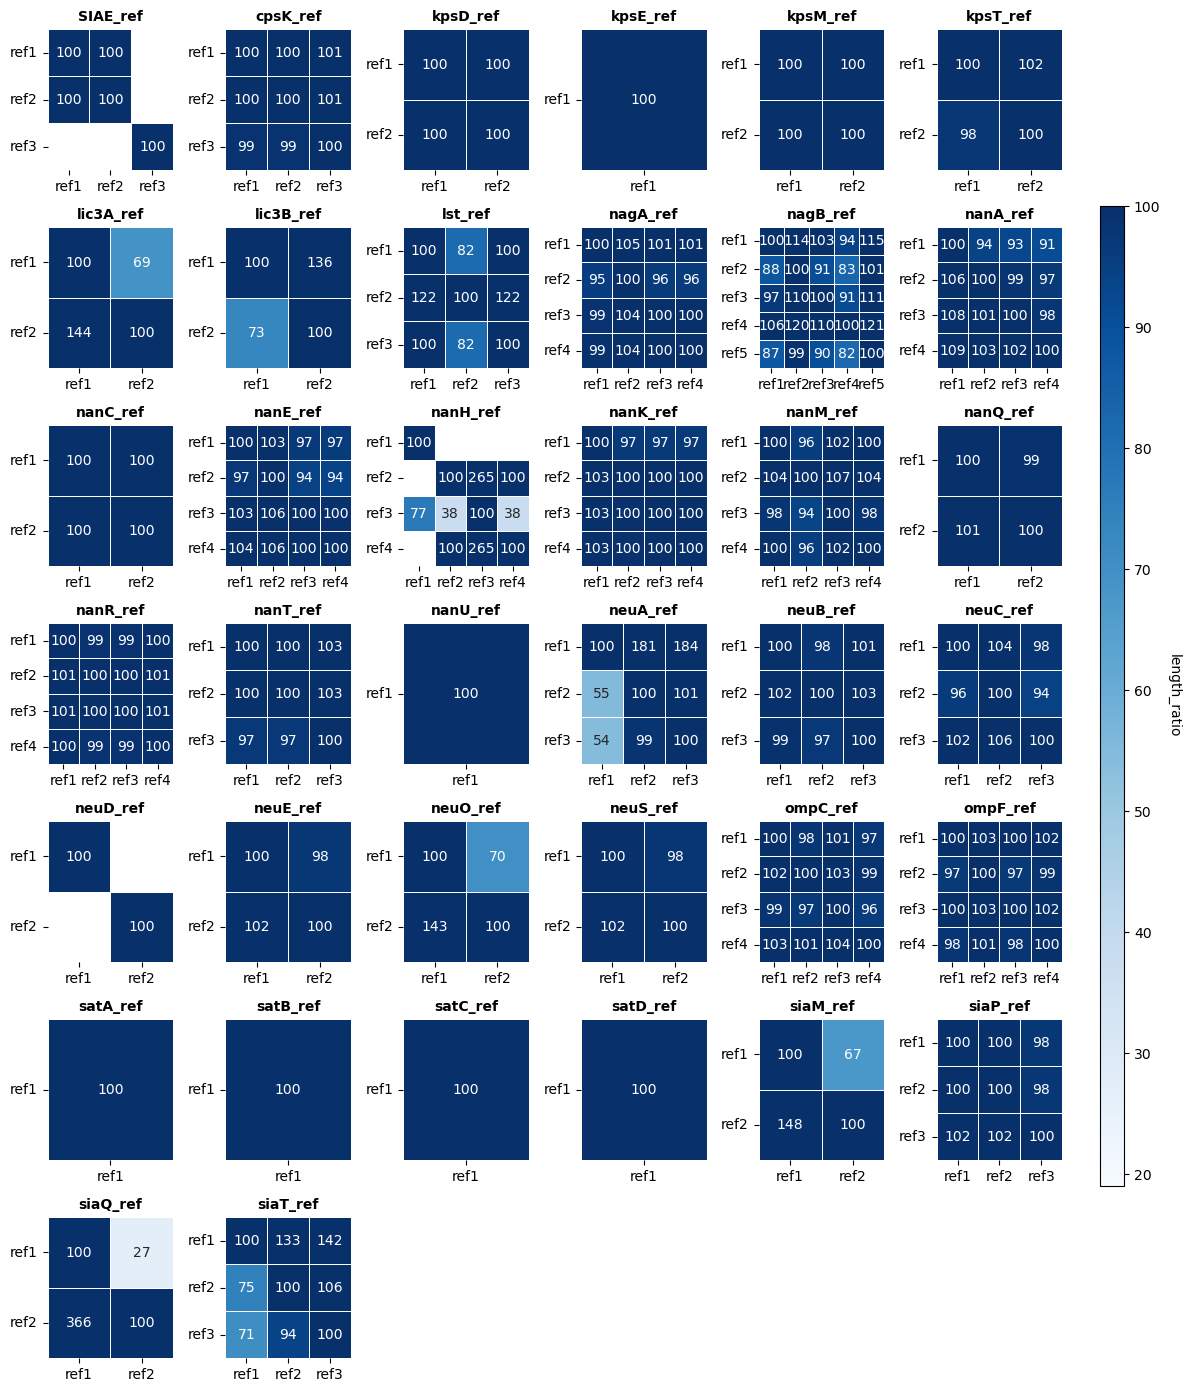

In [17]:
# Plotting length_ratio

directory = "./csvs"

# Parameter to visualize
parameter = 'length_ratio'

# List all .csv files in the folder
files = [f for f in os.listdir(directory) if f.endswith(".csv")]
files.sort()  # keep alphabetical order

# Number of files
n = len(files)

# Automatically define grid size
cols = 6
rows = math.ceil(n / cols)

# Figure size
fig, axes = plt.subplots(rows, cols, figsize=(cols * 2, rows * 2))
axes = axes.flatten()

# Normalization and colormap
vmin, vmax = 19, 100
cmap = plt.cm.Blues
norm = mpl.colors.Normalize(vmin=vmin, vmax=vmax)

# Loop to generate each heatmap
for idx, file in enumerate(files):
    df = pd.read_csv(os.path.join(directory, file))
    
    # Create identity matrix
    matrix = df.pivot(index='qseqid', columns='sseqid', values=parameter)
    
    # Copy only for visualization
    matrix_plot = matrix.copy()
    matrix_plot.index = [f"ref{i+1}" for i in range(len(matrix_plot.index))]
    matrix_plot.columns = [f"ref{j+1}" for j in range(len(matrix_plot.columns))]
    
    # Plot heatmap
    sns.heatmap(
        matrix_plot,
        annot=True, fmt=".0f",
        annot_kws={"size": 10},
        cmap=cmap,
        vmin=vmin, vmax=vmax,
        linewidths=0.5, linecolor="white",
        ax=axes[idx],
        cbar=False
    )
    
    # Title using filename (without .csv)
    title = os.path.splitext(file)[0]
    axes[idx].set_title(title, fontweight="bold", fontsize=10)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('')
    axes[idx].tick_params(axis='x', labelsize=10, rotation=0)
    axes[idx].tick_params(axis='y', labelsize=10, rotation=0)

# Remove extra subplots
for i in range(n, len(axes)):
    fig.delaxes(axes[i])

# Add global colorbar
fig.subplots_adjust(right=0.9)
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])
cb = mpl.colorbar.ColorbarBase(cbar_ax, cmap=cmap, norm=norm)
cb.set_label(parameter, rotation=270, labelpad=15)

# Adjust layout
plt.tight_layout(rect=[0, 0, 0.9, 1], pad=1.0)
plt.show()